All Necessary library file for the code

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV

Read the File from directory

In [ ]:
df=pd.read_csv('new_data.csv')

In [3]:
df.head()

,Gender,Age,City,Profession_Status,Sleep_Duration,Dietary_Habits,Suicidal_Thoughts,Work_Study_Hours,Financial_Stress,Family_History,Depression,Pressure,Satisfaction
0,Female,49,Ludhiana,working professional,More than 8 hours,Healthy,No,1,2,No,0,5,2
1,Male,26,Varanasi,working professional,Less than 5 hours,Unhealthy,Yes,7,3,No,1,4,3
2,Male,33,Visakhapatnam,student,5-6 hours,Healthy,Yes,3,1,No,1,5,2
3,Male,22,Mumbai,working professional,Less than 5 hours,Moderate,Yes,10,1,Yes,1,5,1
4,Female,30,Kanpur,working professional,5-6 hours,Unhealthy,Yes,9,4,Yes,0,1,1


## To check the number of features and datatype

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140485 entries, 0 to 140484
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Gender             140485 non-null  object
 1   Age                140485 non-null  int64 
 2   City               140485 non-null  object
 3   Profession_Status  140485 non-null  object
 4   Sleep_Duration     140485 non-null  object
 5   Dietary_Habits     140485 non-null  object
 6   Suicidal_Thoughts  140485 non-null  object
 7   Work_Study_Hours   140485 non-null  int64 
 8   Financial_Stress   140485 non-null  int64 
 9   Family_History     140485 non-null  object
 10  Depression         140485 non-null  int64 
 11  Pressure           140485 non-null  int64 
 12  Satisfaction       140485 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 13.9+ MB


To check the number of rows of the data and the fetaures.

In [5]:
df.shape

(140485, 13)

Age:
Average: 40.39 years
Most people are in the 29–51 age range (25th–75th percentiles).
Minimum: 18 years, Maximum: 60 years.

Work/Study Hours:
Average: 6.25 hours per day.
Most work/study between 3–10 hours daily.
Minimum: 0 hours, Maximum: 12 hours.
Financial Stress (Scale 1–5):

Average: 2.99.
Most individuals experience moderate financial stress (score 2–4).
Minimum: 1, Maximum: 5.
Depression (Binary: 0 = No, 1 = Yes):

18.16% of the population shows signs of depression.
Majority do not report depression (median = 0).
Pressure (Scale 1–5):

Average: 3.03.
Most feel moderate to high levels of pressure (score 2–4).
Minimum: 1, Maximum: 5.
Satisfaction (Scale 1–5):

Average: 2.97.
Most report moderate satisfaction levels (score 2–4).
Minimum: 1, Maximum: 5.

In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,140485.0,40.391359,12.382490,18.0,29.0,42.0,51.0,60.0
Work_Study_Hours,140485.0,6.253493,3.853582,0.0,3.0,6.0,10.0,12.0
Financial_Stress,140485.0,2.989002,1.413544,1.0,2.0,3.0,4.0,5.0
Depression,140485.0,0.181649,0.385557,0.0,0.0,0.0,0.0,1.0
Pressure,140485.0,3.027298,1.402037,1.0,2.0,3.0,4.0,5.0
Satisfaction,140485.0,2.968595,1.405285,1.0,2.0,3.0,4.0,5.0


Age:
Distribution: Most participants are aged 20–50, with peaks in their 30s–40s.
Depression: More common among younger and middle-aged groups.
Trends:
Younger participants report higher financial stress.
Satisfaction levels show no clear trend with age.
Work_Study_Hours:
Distribution: Peaks at 6 hours/day, with fewer working/studying over 10 hours.
Depression: Higher work/study hours (10–12 hours) correlate with more depression.
Trends:
Longer hours associate with higher financial stress.
Moderate hours (3–6) align with lower financial stress and depression.
Financial_Stress:
Distribution: Peaks at level 3 (moderate stress).
Depression: More common at higher stress levels (4–5).
Trends:
High financial stress links to lower satisfaction.
Lower financial stress aligns with less depression.
Pressure:
Distribution: Peaks at level 3 (moderate pressure).
Depression: Strong correlation with higher pressure levels (4–5).
Trends:
Higher pressure reduces satisfaction.
Moderate pressure (2–3) aligns with better outcomes (less depression, higher satisfaction).
Satisfaction:
Distribution: Peaks at level 3 (moderate satisfaction).
Depression: Lower satisfaction (1–2) strongly associated with depression.
Trends:
High satisfaction (4–5) correlates with less financial stress and pressure.
Low satisfaction aligns with higher stress, pressure, and depression.

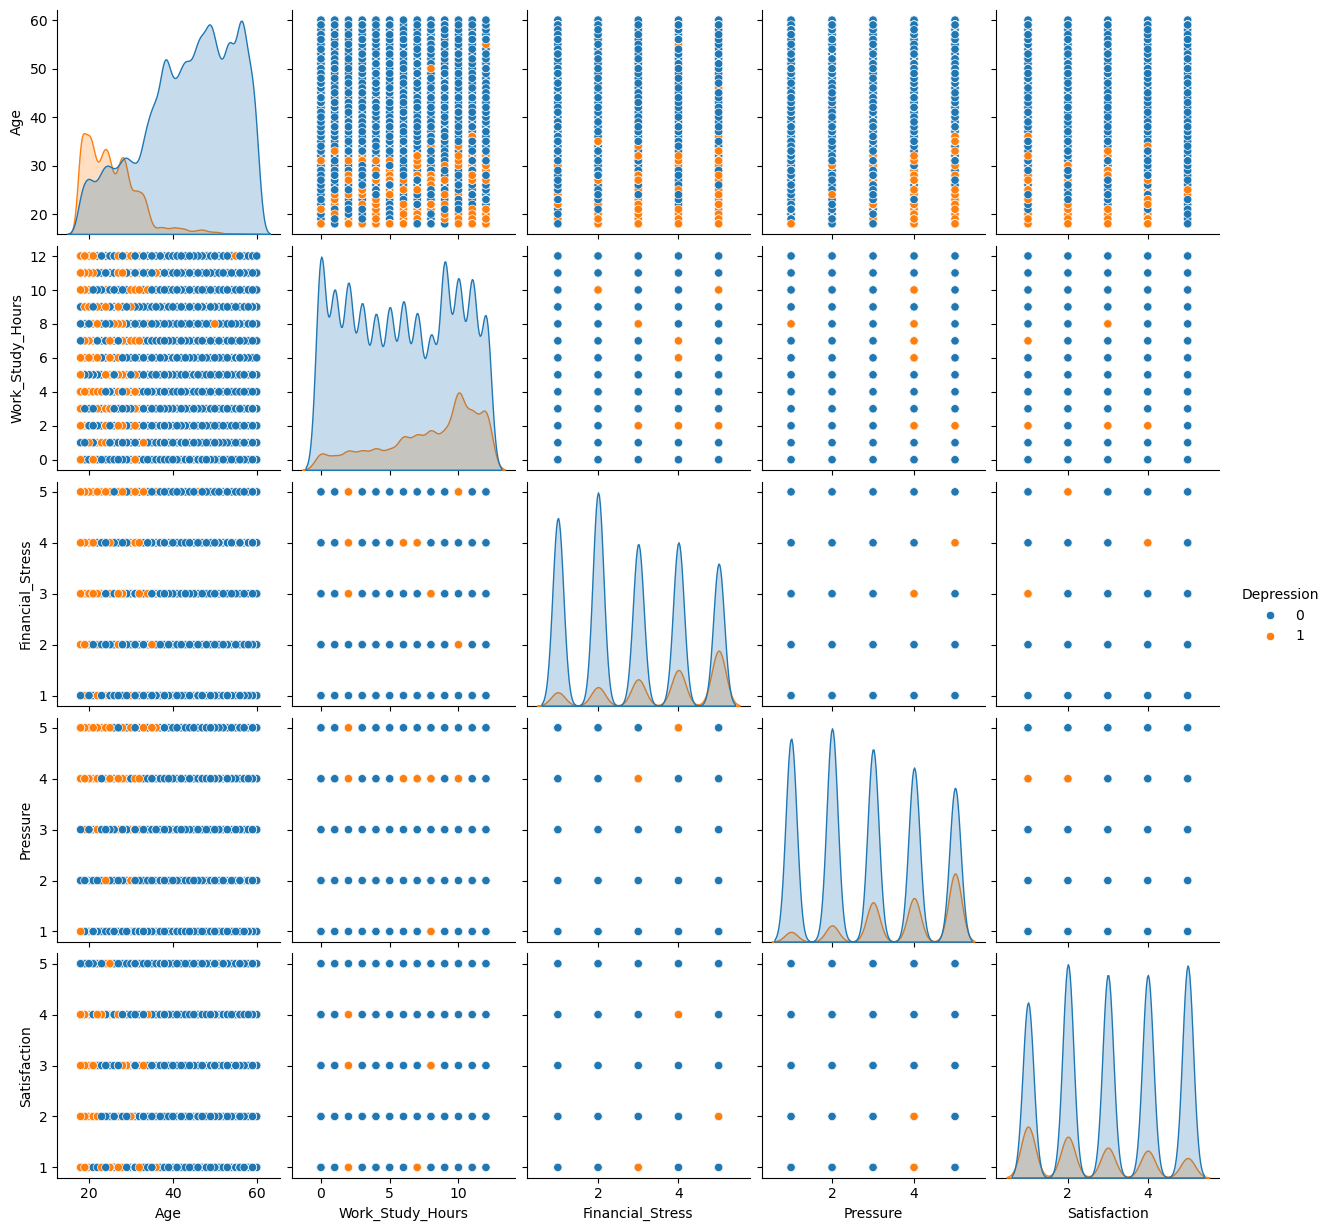

In [7]:

sns.pairplot(df , hue='Depression' , diag_kind = 'kde')

Prevalence of Depression:

About 18% of the dataset indicates depression, suggesting this is a significant minority worth focusing on.
The majority (82%) does not report depression.
Uniform Counts Across Features:

Each column has the same count for both depression and non-depression groups, indicating no missing data for these features in the grouped dataset.
Features included: Gender, Age, City, Profession Status, Sleep Duration, Dietary Habits, Suicidal Thoughts, Work/Study Hours, Financial Stress, Family History, and Pressure.

In [8]:
df.groupby(["Depression"]).count()

,Gender,Age,City,Profession_Status,Sleep_Duration,Dietary_Habits,Suicidal_Thoughts,Work_Study_Hours,Financial_Stress,Family_History,Pressure,Satisfaction
Depression,,,,,,,,,,,,
0,114966,114966,114966,114966,114966,114966,114966,114966,114966,114966,114966,114966
1,25519,25519,25519,25519,25519,25519,25519,25519,25519,25519,25519,25519


Overall Distribution:

A significantly larger proportion of the population falls under the "Working Professional" category compared to "Student".
Depression in Students:

The count of students with depression (orange) is relatively high compared to students without depression (blue).
Students show a higher proportion of depression cases compared to working professionals.
Depression in Working Professionals:

Working professionals have a high overall count, but the proportion of individuals with depression (orange) is much smaller compared to those without depression (blue).
Depression is less prevalent in this group, likely due to the much larger population size.
Trend by Profession:

Students: Higher relative prevalence of depression.
Working Professionals: Lower relative prevalence of depression despite higher absolute numbers.

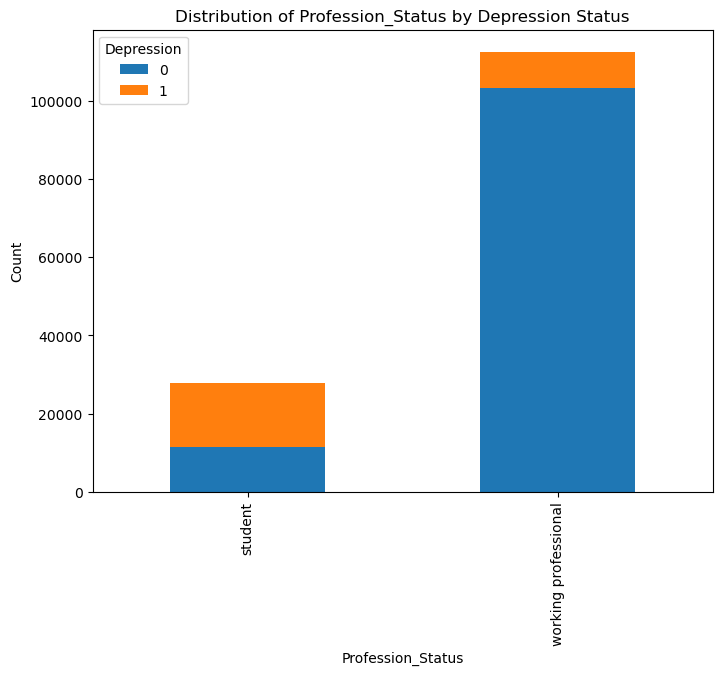

In [10]:
categorical_features = [ 'Profession_Status']

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    pd.crosstab(df[feature], df['Depression']).plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Distribution of {feature} by Depression Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Depression')
    plt.show()



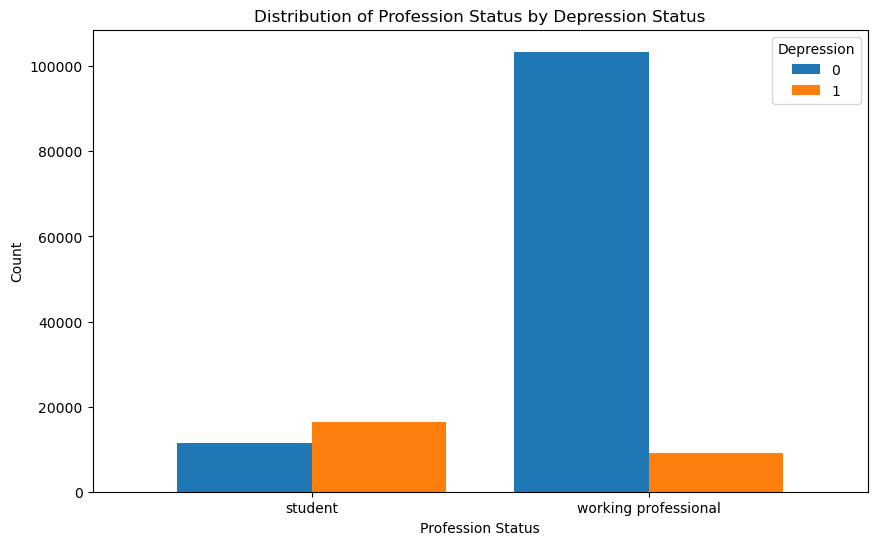

In [18]:
profession_depression_counts = df.groupby(['Profession_Status', 'Depression']).size().unstack()

# Plotting side-by-side bars
profession_depression_counts.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Distribution of Profession Status by Depression Status')
plt.xlabel('Profession Status')
plt.ylabel('Count')
plt.legend(title='Depression')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal for readability
plt.show()

1. Gender and Depression:
Depression is evenly distributed across genders.
Slightly higher proportion of depression in females.
2. City and Depression:
Depression prevalence is consistent across cities.
Majority of individuals in every city do not report depression.
3. Profession Status:
Students: Higher relative risk of depression.
Working Professionals: Lower relative risk but higher absolute cases.
4. Sleep Duration:
7-8 Hours: Lowest depression cases.
<5 Hours and >8 Hours: Higher depression prevalence.
5. Dietary Habits:
Healthy Diet: Lower depression cases.
Unhealthy/Moderate Diet: Higher depression prevalence.
6. Suicidal Thoughts:
Strong correlation between suicidal thoughts and depression.
7. Family History:
Family history of mental health issues increases depression risk.

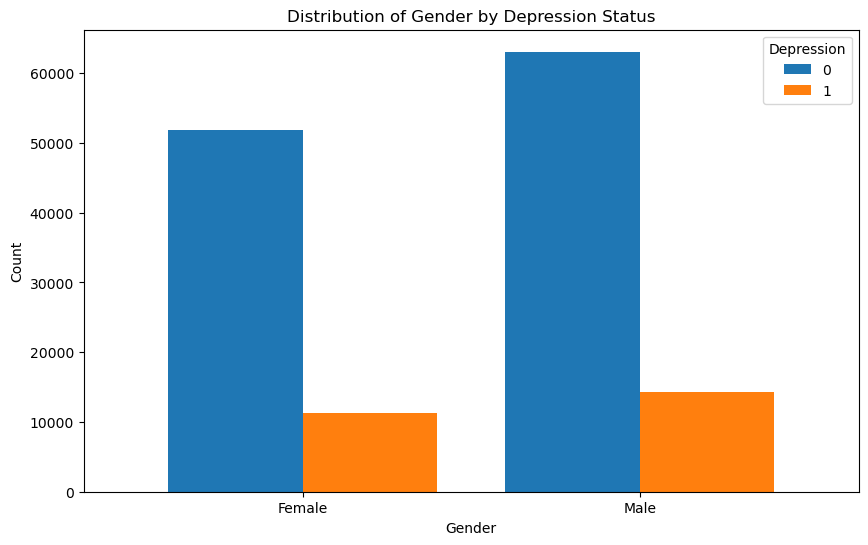

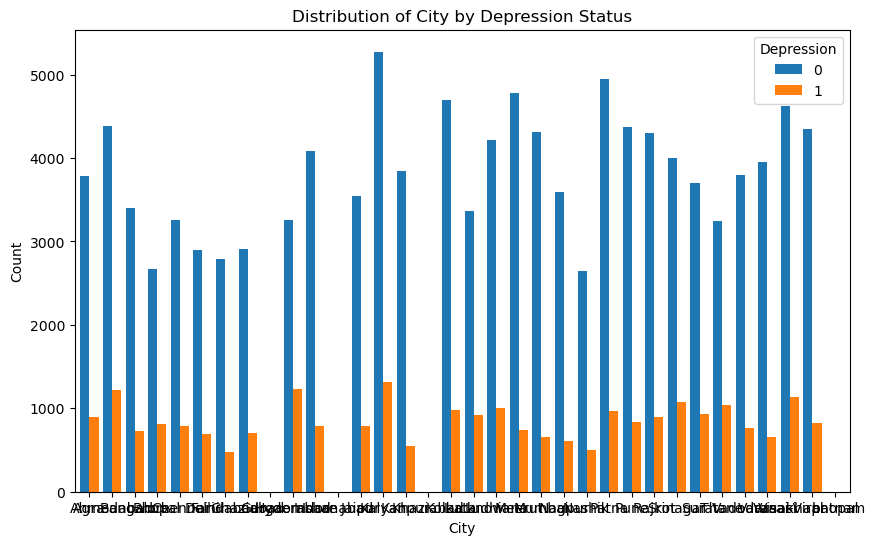

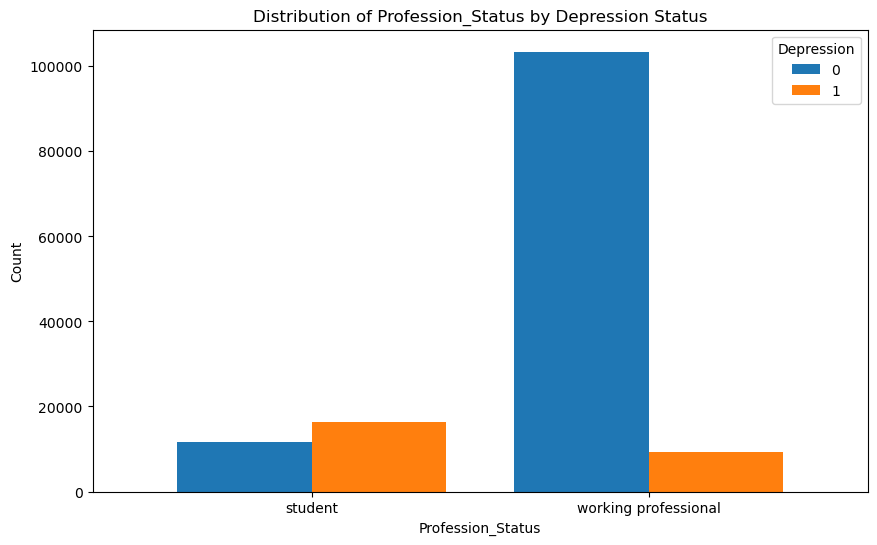

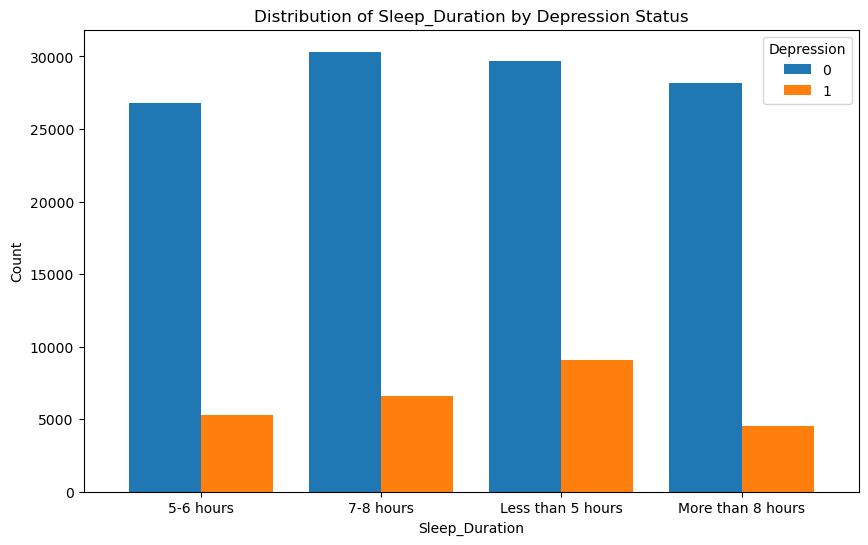

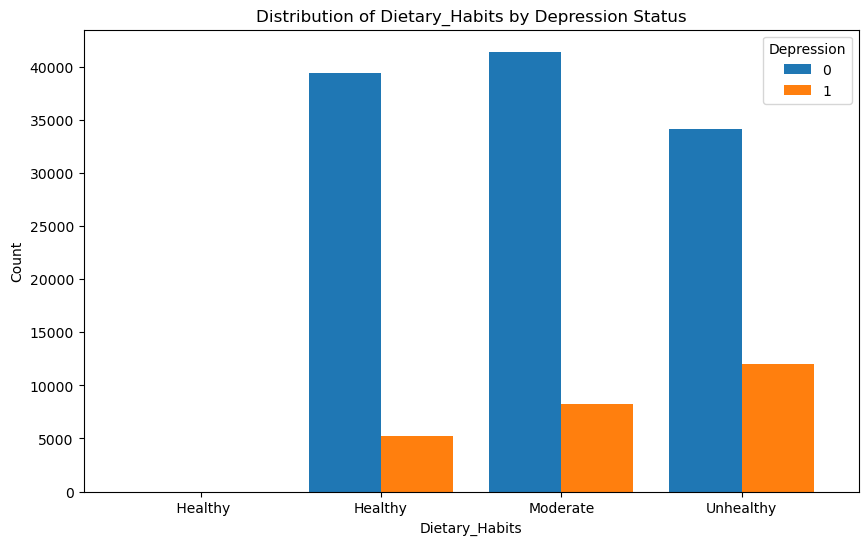

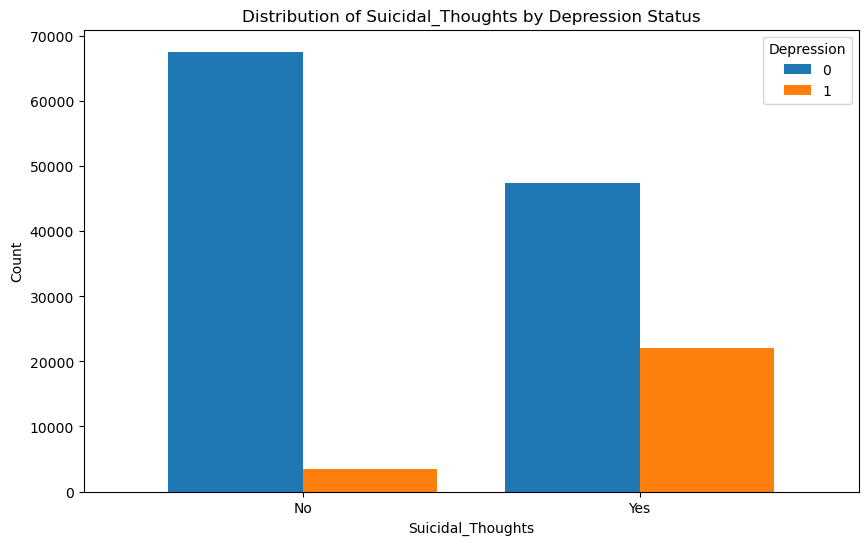

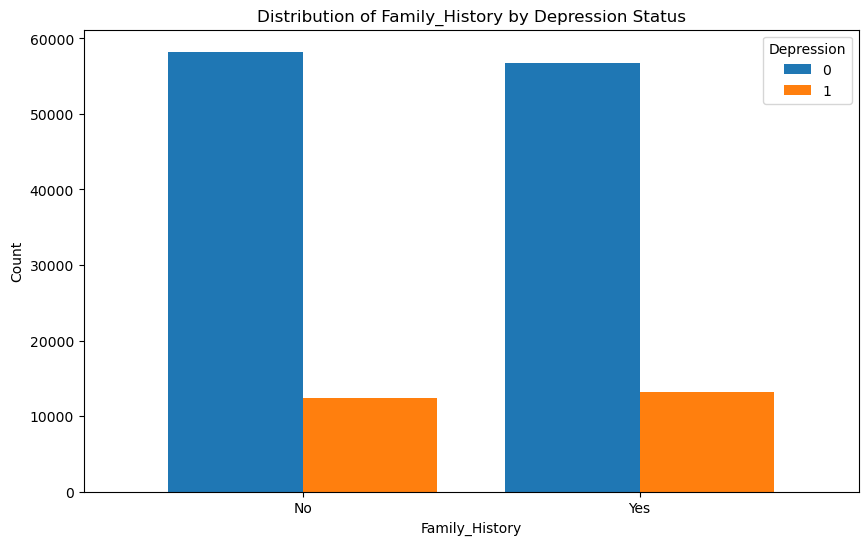

In [143]:

categorical_features = ['Gender', 'City', 'Profession_Status', 'Sleep_Duration', 
                        'Dietary_Habits', 'Suicidal_Thoughts', 'Family_History']


for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    
 
    feature_depression_counts = df.groupby([feature, 'Depression']).size().unstack()
    

    feature_depression_counts.plot(kind='bar', ax=plt.gca(), width=0.8)
    plt.title(f'Distribution of {feature} by Depression Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Depression')
    plt.xticks(rotation=0)
    plt.show()

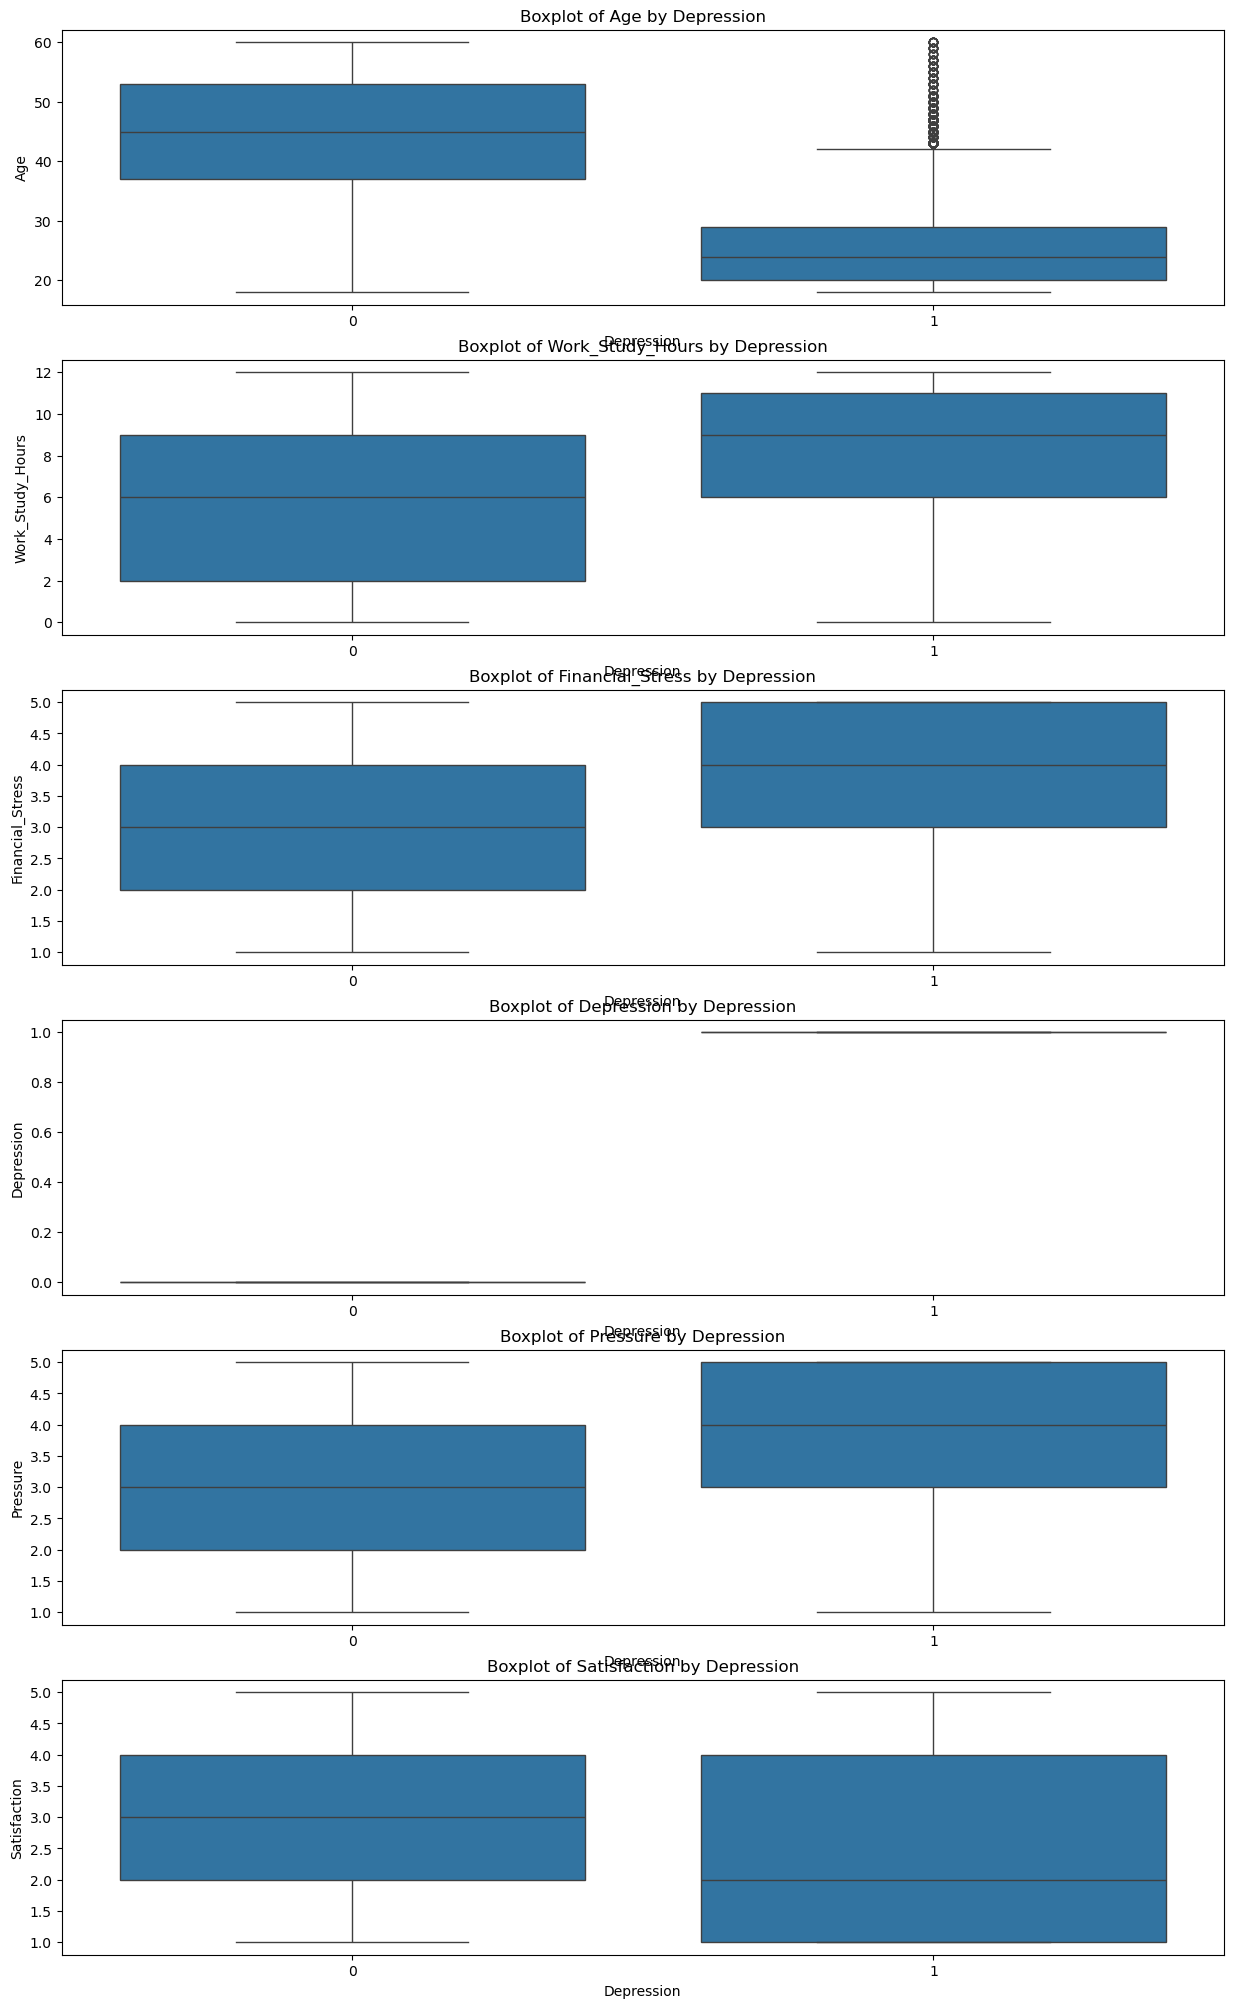

In [39]:

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(15, 25))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.boxplot(data=df, x='Depression', y=feature)
    plt.title(f'Boxplot of {feature} by Depression')
    plt.xlabel('Depression')
    plt.ylabel(feature)


plt.show()

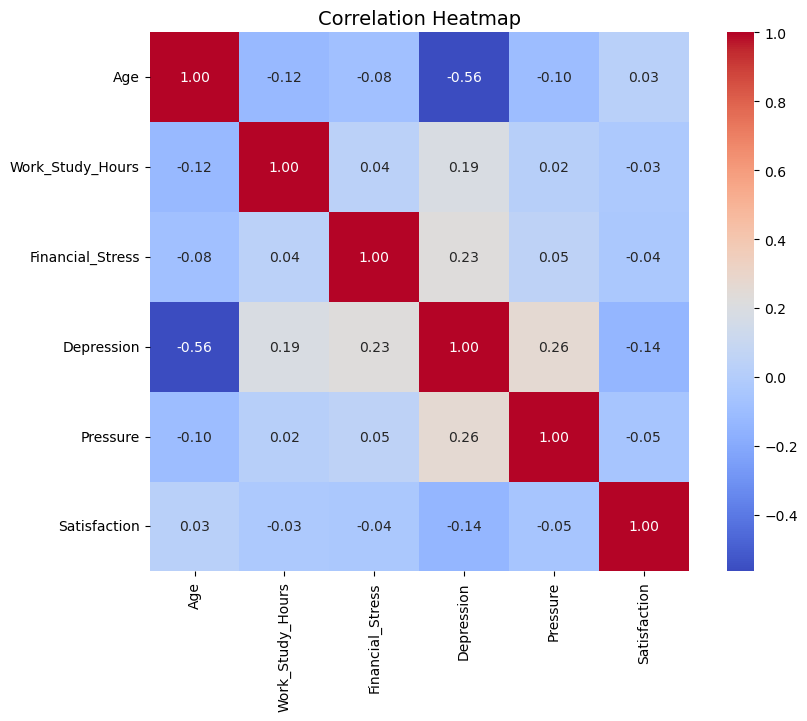

In [37]:
numerical_columns = ['Age', 'Work_Study_Hours', 'Financial_Stress', 'Depression', 'Pressure', 'Satisfaction']
plt.figure(figsize=(10, 7))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

In [41]:
df.shape

(140485, 13)

In [43]:

df_processed = df.copy()


categorical_cols = ['Gender', 'City', 'Profession_Status', 'Sleep_Duration',
                    'Dietary_Habits', 'Suicidal_Thoughts', 'Family_History']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le  # Save encoder for later use


target = 'Depression'
X = df_processed.drop(columns=[target])
y = df_processed[target]


numerical_cols = ['Age', 'Work_Study_Hours', 'Financial_Stress', 'Pressure', 'Satisfaction']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112388, 12), (28097, 12), (112388,), (28097,))

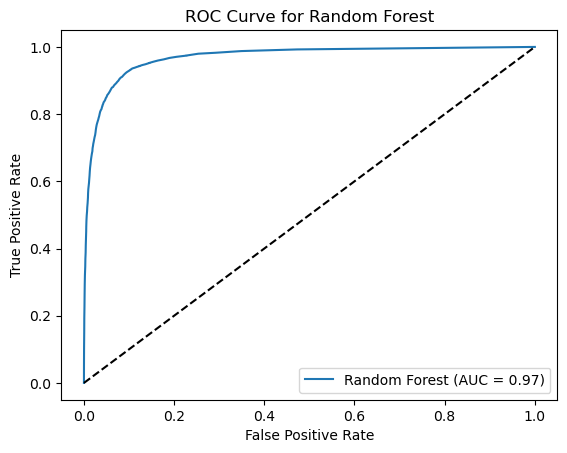

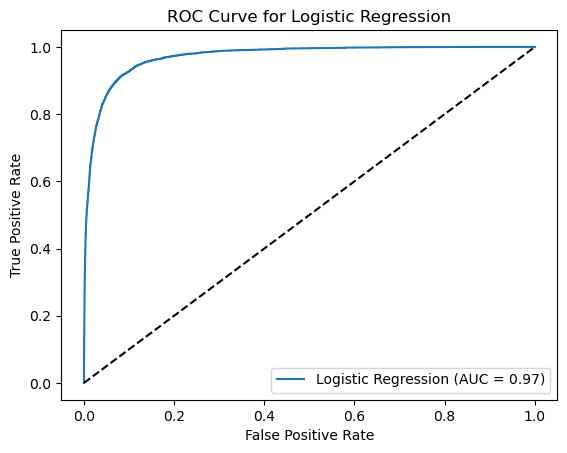

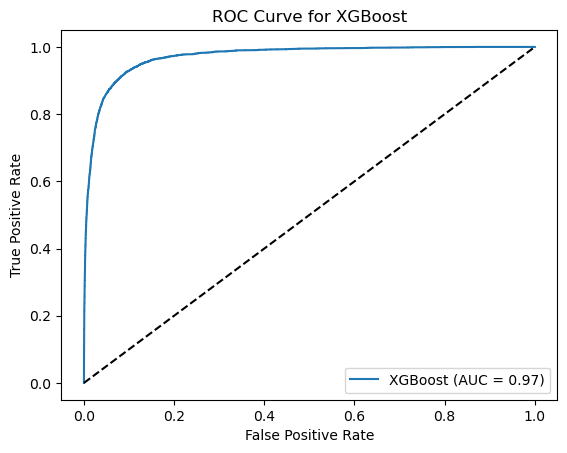

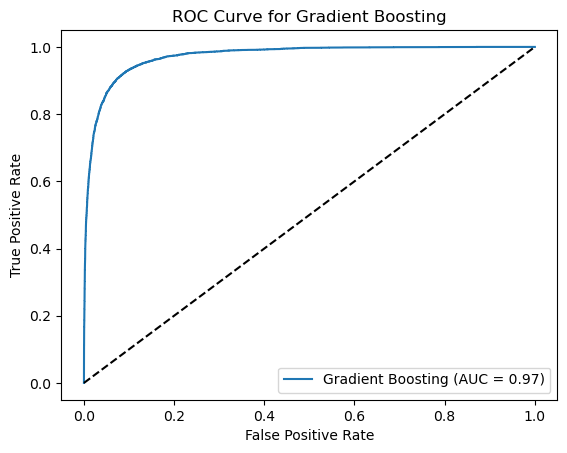

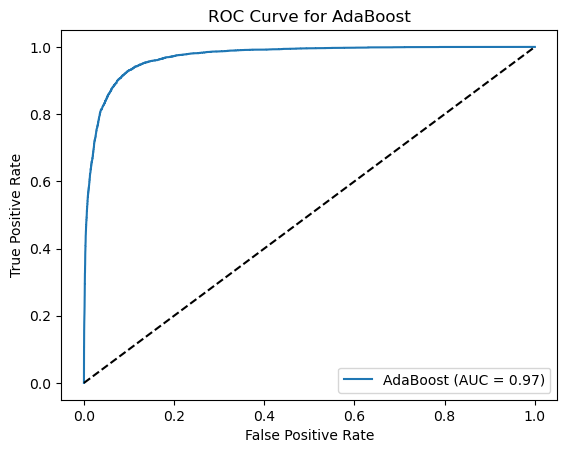

In [65]:

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME', random_state=42),
    
}


results_with_metrics = {}


for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
  
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = auc(fpr, tpr)
    except:
        y_proba = None
        fpr, tpr, auc_score = None, None, None
    
  
    accuracy = model.score(X_test, y_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    
    # Store results
    results_with_metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc_score
    }
    
    
    if fpr is not None and tpr is not None:
        plt.figure()
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}')
        plt.legend(loc='lower right')
        plt.show()



In [61]:

results_df_metrics = pd.DataFrame(results_with_metrics).T
print("Updated Simplified Model Evaluation Results with Extended Metrics:")
print(results_df_metrics)

Updated Simplified Model Evaluation Results with Extended Metrics:
                     Accuracy  Precision    Recall  F1-Score       AUC
Random Forest        0.934940   0.843252  0.788401  0.814905  0.968431
Logistic Regression  0.935082   0.840956  0.792516  0.816018  0.971454
XGBoost              0.937502   0.841076  0.808777  0.824610  0.971257
Gradient Boosting    0.936933   0.847518  0.796042  0.820974  0.972421
AdaBoost             0.934548   0.835284  0.796826  0.815602  0.970498


In [67]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:\n{cm}\n")

Confusion Matrix for Random Forest:
[[22245   748]
 [ 1080  4024]]

Confusion Matrix for Logistic Regression:
[[22228   765]
 [ 1059  4045]]

Confusion Matrix for XGBoost:
[[22213   780]
 [  976  4128]]

Confusion Matrix for Gradient Boosting:
[[22262   731]
 [ 1041  4063]]

Confusion Matrix for AdaBoost:
[[22191   802]
 [ 1037  4067]]



Performing Grid Search for Random Forest on Sampled Data...


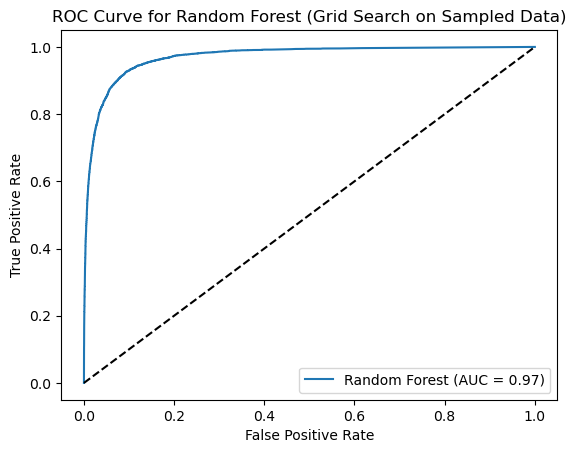

Performing Grid Search for Logistic Regression on Sampled Data...


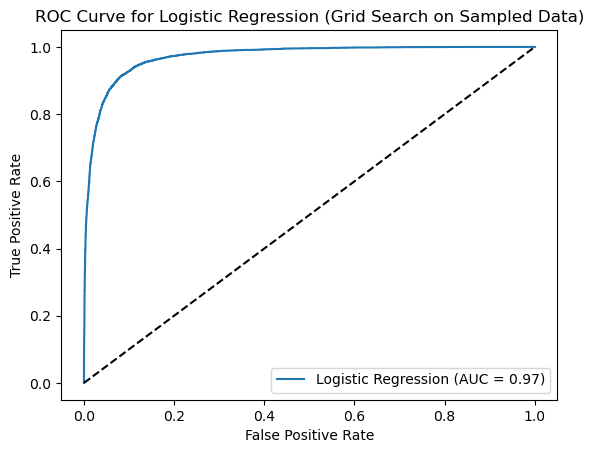

Performing Grid Search for XGBoost on Sampled Data...


C:\Users\varanasi.patra\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


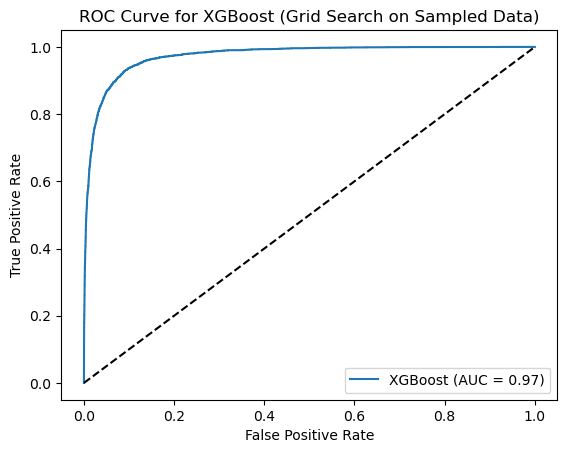

Performing Grid Search for Gradient Boosting on Sampled Data...


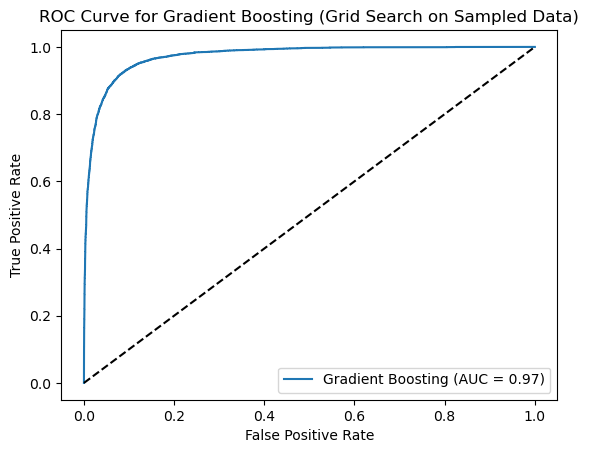

Performing Grid Search for AdaBoost on Sampled Data...


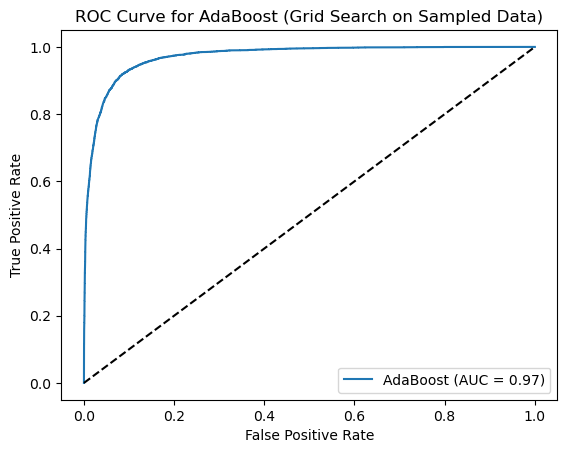

Grid Search Results on Sampled Data with Best Parameters and Metrics:
                                                       Best Parameters  \
Random Forest        {'max_depth': None, 'min_samples_split': 5, 'n...   
Logistic Regression                  {'C': 0.1, 'solver': 'liblinear'}   
XGBoost              {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...   
Gradient Boosting    {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...   
AdaBoost                   {'learning_rate': 0.5, 'n_estimators': 100}   

                     Accuracy Precision    Recall  F1-Score       AUC  
Random Forest        0.935972  0.845784  0.791928   0.81797  0.970351  
Logistic Regression  0.934726  0.839634  0.791928  0.815084  0.971456  
XGBoost              0.938677   0.84906  0.805643  0.826782  0.973155  
Gradient Boosting    0.938356  0.850083  0.802116  0.825403  0.973279  
AdaBoost             0.934762  0.835212  0.798393  0.816388  0.971518  


In [77]:

adjusted_param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5]
    },
    'Logistic Regression': {
        'C': [0.1, 1],
        'solver': ['liblinear']
    },
    'XGBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.1, 0.2],
        'max_depth': [3, 6]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.1, 0.2],
        'max_depth': [3, 6]
    },
    'AdaBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.1, 0.5]
    }
}


grid_search_results_sampled = {}


for model_name, model in models.items():
    print(f"Performing Grid Search for {model_name} on Sampled Data...")
    if model_name in adjusted_param_grids:
        grid_search = GridSearchCV(estimator=model, param_grid=adjusted_param_grids[model_name], 
                                   cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        
      
        y_pred = best_model.predict(X_test)
        try:
            y_proba = best_model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            auc_score = auc(fpr, tpr)
        except:
            y_proba = None
            fpr, tpr, auc_score = None, None, None
        
        accuracy = best_model.score(X_test, y_test)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
        
      
        grid_search_results_sampled[model_name] = {
            'Best Parameters': grid_search.best_params_,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC': auc_score
        }
        
        
        if fpr is not None and tpr is not None:
            plt.figure()
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
            plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve for {model_name} (Grid Search on Sampled Data)')
            plt.legend(loc='lower right')
            plt.show()

# Convert grid search results to DataFrame and display
grid_search_results_sampled_df = pd.DataFrame(grid_search_results_sampled).T
print("Grid Search Results on Sampled Data with Best Parameters and Metrics:")
print(grid_search_results_sampled_df)

Downsample the majoity class to make both to very close.

In [81]:
# Calculate the desired size for the majority class (e.g., 1.5 times the minority class size)
desired_majority_size = int(len(minority_class) * 1.5)

# Downsample the majority class to the desired size
majority_downsampled = majority_class.sample(n=desired_majority_size, random_state=42)

# Combine the downsampled majority class with the minority class
df_balanced = pd.concat([majority_downsampled, minority_class])

# Shuffle the dataset to mix the classes
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the new class distribution
print("Class distribution after partial downsampling:")
print(df_balanced['Depression'].value_counts())

Class distribution after partial downsampling:
Depression
0    38278
1    25519
Name: count, dtype: int64


In [85]:
df_balanced.groupby(["Depression"]).count()

,Gender,Age,City,Profession_Status,Sleep_Duration,Dietary_Habits,Suicidal_Thoughts,Work_Study_Hours,Financial_Stress,Family_History,Pressure,Satisfaction
Depression,,,,,,,,,,,,
0,38278,38278,38278,38278,38278,38278,38278,38278,38278,38278,38278,38278
1,25519,25519,25519,25519,25519,25519,25519,25519,25519,25519,25519,25519


In [87]:
df_balanced.shape

(63797, 13)

In [89]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63797 entries, 0 to 63796
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             63797 non-null  object
 1   Age                63797 non-null  int64 
 2   City               63797 non-null  object
 3   Profession_Status  63797 non-null  object
 4   Sleep_Duration     63797 non-null  object
 5   Dietary_Habits     63797 non-null  object
 6   Suicidal_Thoughts  63797 non-null  object
 7   Work_Study_Hours   63797 non-null  int64 
 8   Financial_Stress   63797 non-null  int64 
 9   Family_History     63797 non-null  object
 10  Depression         63797 non-null  int64 
 11  Pressure           63797 non-null  int64 
 12  Satisfaction       63797 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 6.3+ MB


In [93]:
df_balanced.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,63797.0,36.415599,12.890976,18.0,25.0,35.0,48.0,60.0
Work_Study_Hours,63797.0,6.670251,3.817852,0.0,3.0,7.0,10.0,12.0
Financial_Stress,63797.0,3.175008,1.420479,1.0,2.0,3.0,4.0,5.0
Depression,63797.0,0.400003,0.489902,0.0,0.0,0.0,1.0,1.0
Pressure,63797.0,3.234760,1.396698,1.0,2.0,3.0,5.0,5.0
Satisfaction,63797.0,2.852187,1.409129,1.0,2.0,3.0,4.0,5.0


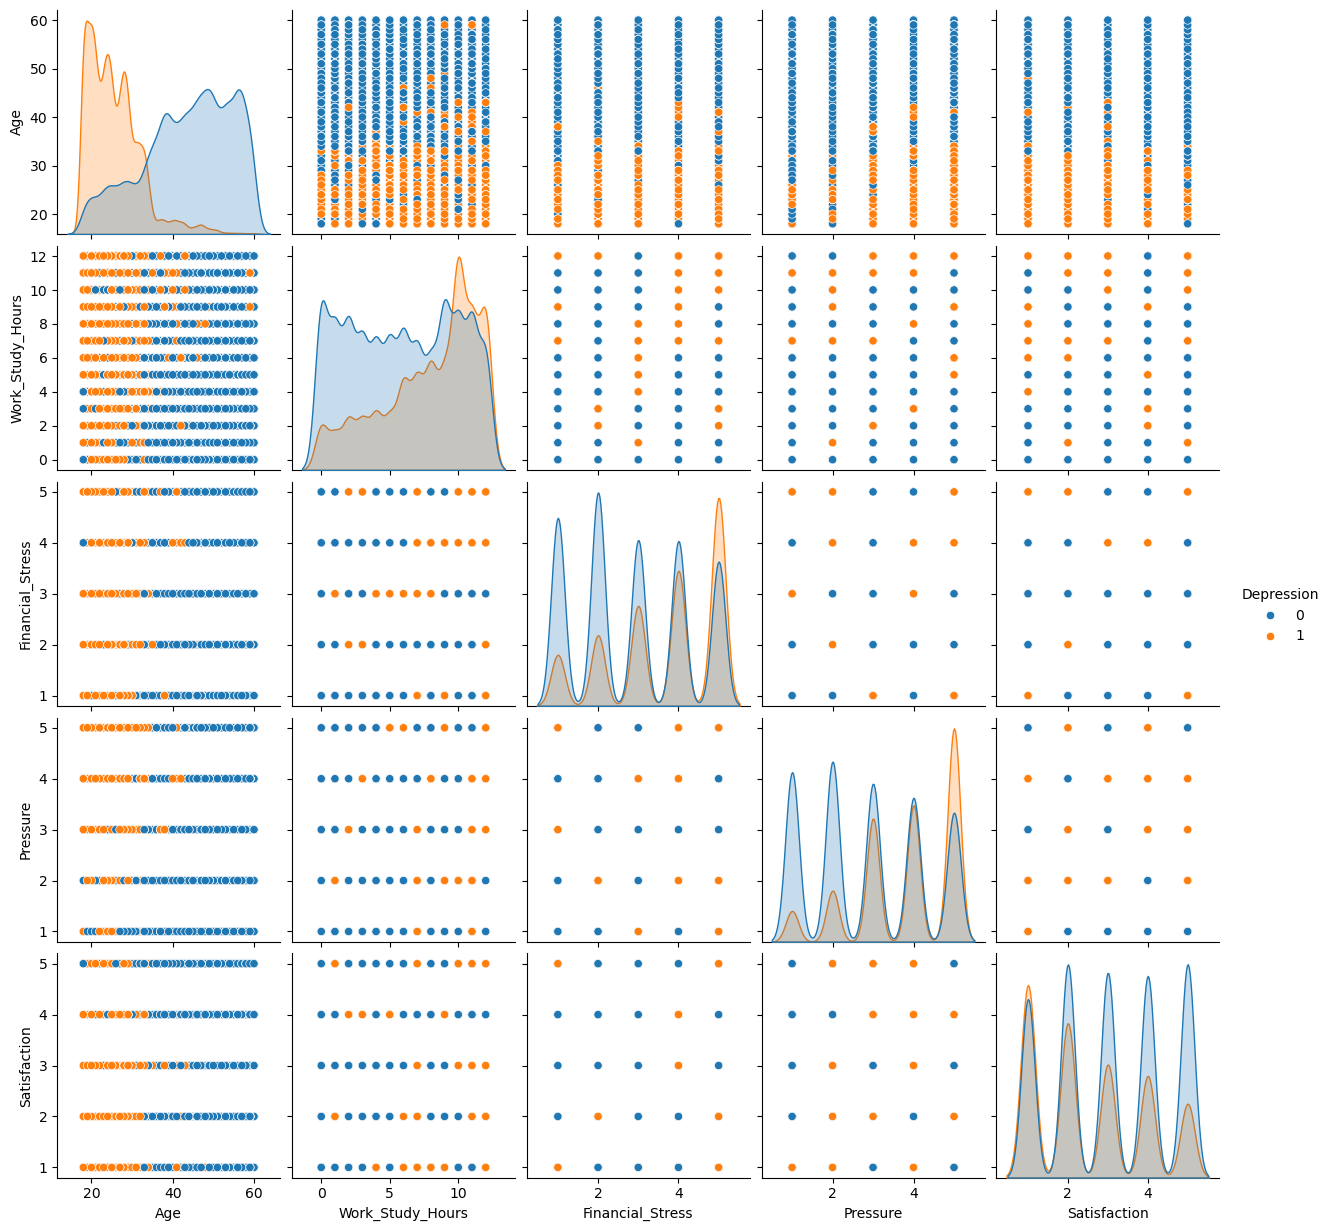

In [95]:

sns.pairplot(df_balanced , hue='Depression' , diag_kind = 'kde')

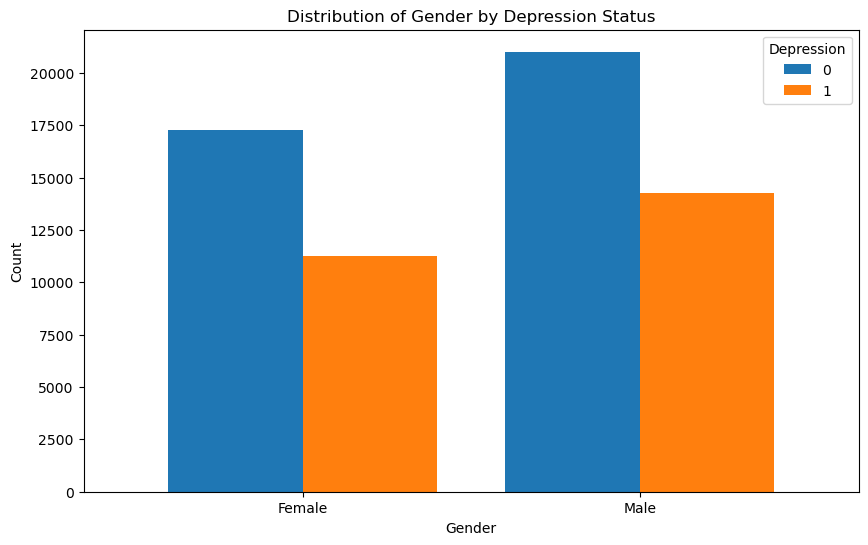

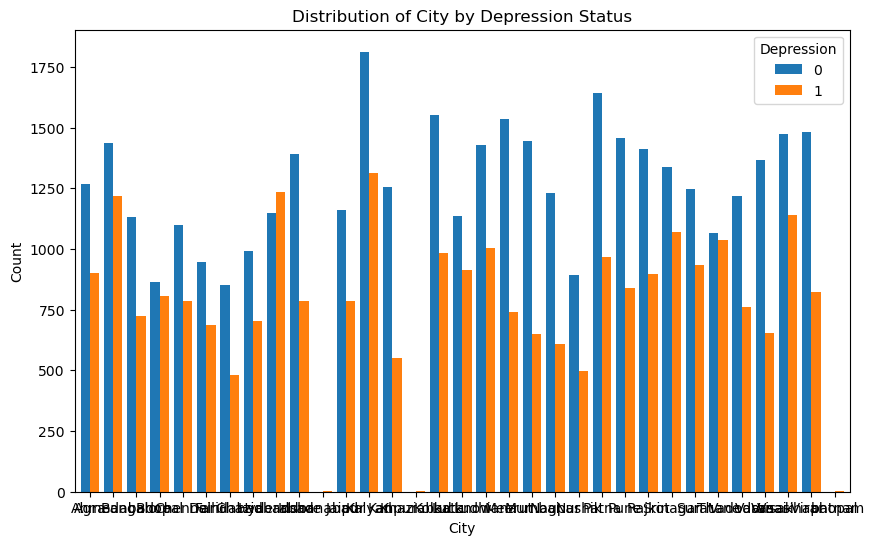

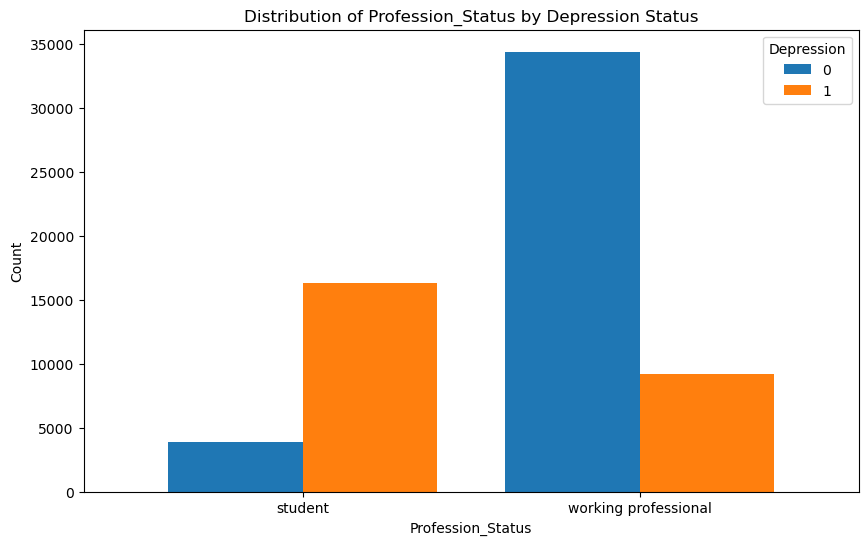

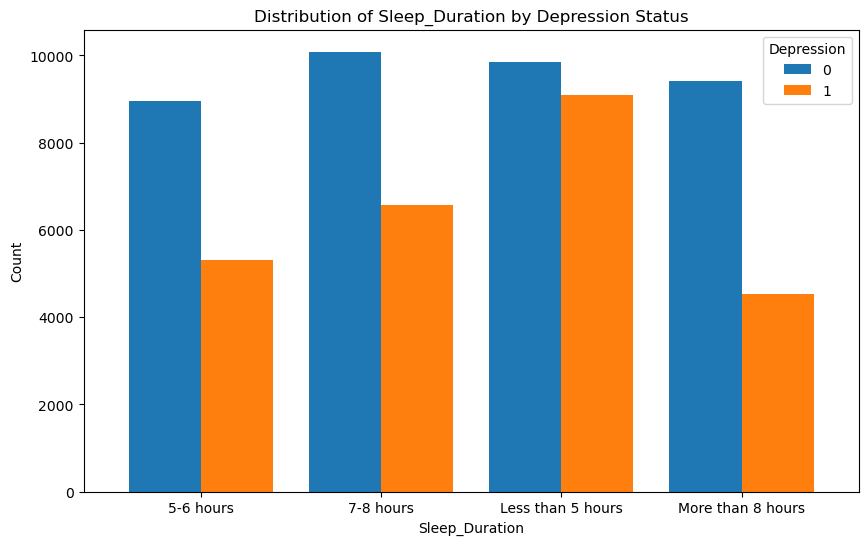

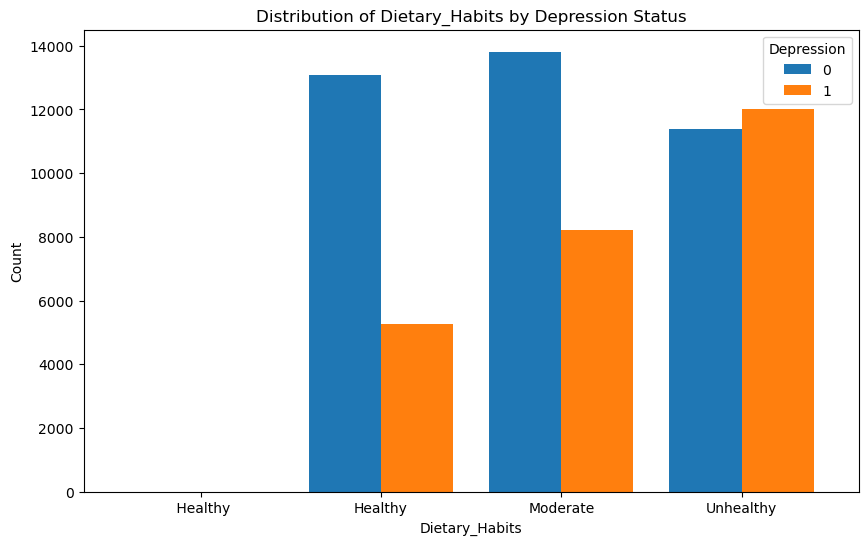

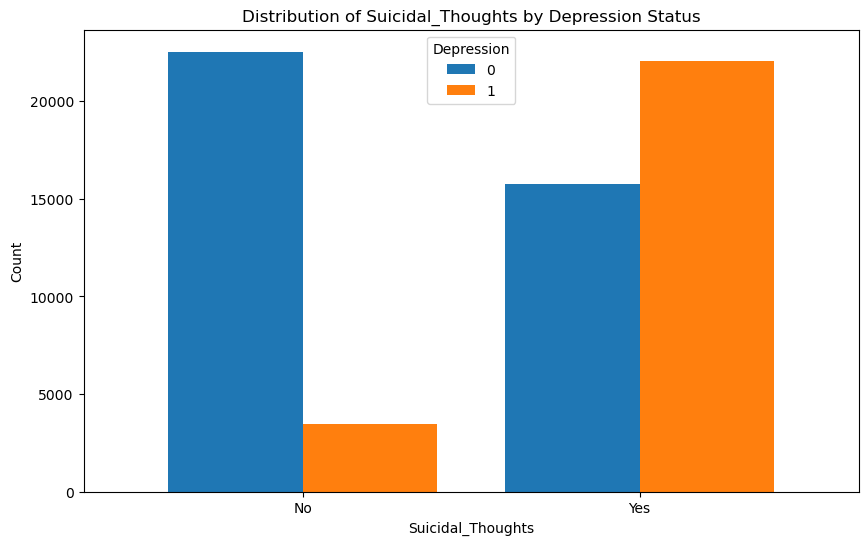

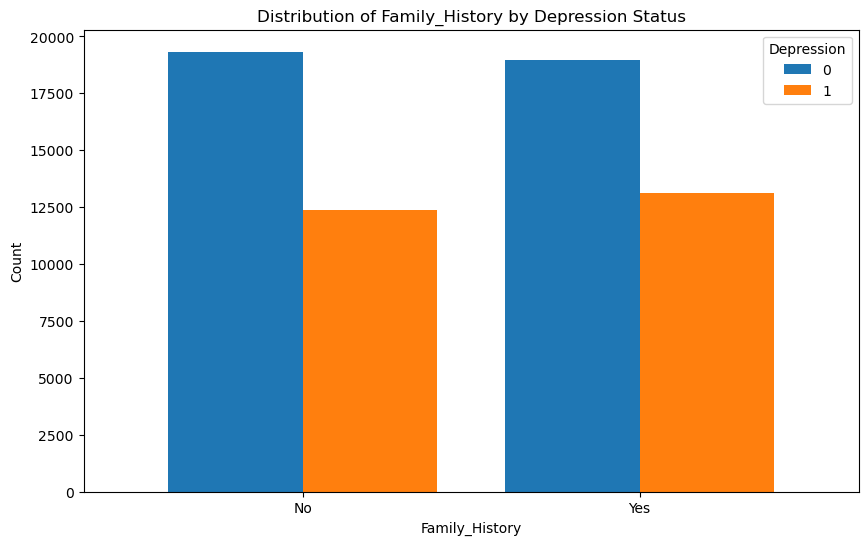

In [99]:
categorical_features = ['Gender', 'City', 'Profession_Status', 'Sleep_Duration', 
                        'Dietary_Habits', 'Suicidal_Thoughts', 'Family_History']


for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    
 
    feature_depression_counts = df_balanced.groupby([feature, 'Depression']).size().unstack()
    

    feature_depression_counts.plot(kind='bar', ax=plt.gca(), width=0.8)
    plt.title(f'Distribution of {feature} by Depression Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Depression')
    plt.xticks(rotation=0)
    plt.show()

1. Boxplot of Age by Depression:
Description:
Median age is similar for both groups (depression and no depression).
Depression cases (1) show a slightly younger age distribution compared to no depression (0).
Summary:
Depression tends to occur slightly more in younger individuals.
2. Boxplot of Work_Study_Hours by Depression:
Description:
Median work/study hours are similar for both groups.
Depression cases (1) show a wider range, with some outliers working long hours.
Summary:
Higher work/study hours are linked to an increased depression risk.
3. Boxplot of Financial_Stress by Depression:
Description:
Median financial stress is higher for individuals with depression (1).
Depression cases show a tighter range at higher stress levels.
Summary:
Financial stress is strongly associated with depression.
4. Boxplot of Pressure by Depression:
Description:
Depression cases (1) have higher median pressure than no depression (0).
A slightly wider range is observed for depressed individuals.
Summary:
Increased pressure correlates with higher depression prevalence.
5. Boxplot of Satisfaction by Depression:
Description:
Median satisfaction is lower for depression cases (1).
Satisfaction values for depression cases show a tight distribution at lower levels.
Summary:
Lower satisfaction is a key indicator of depression.


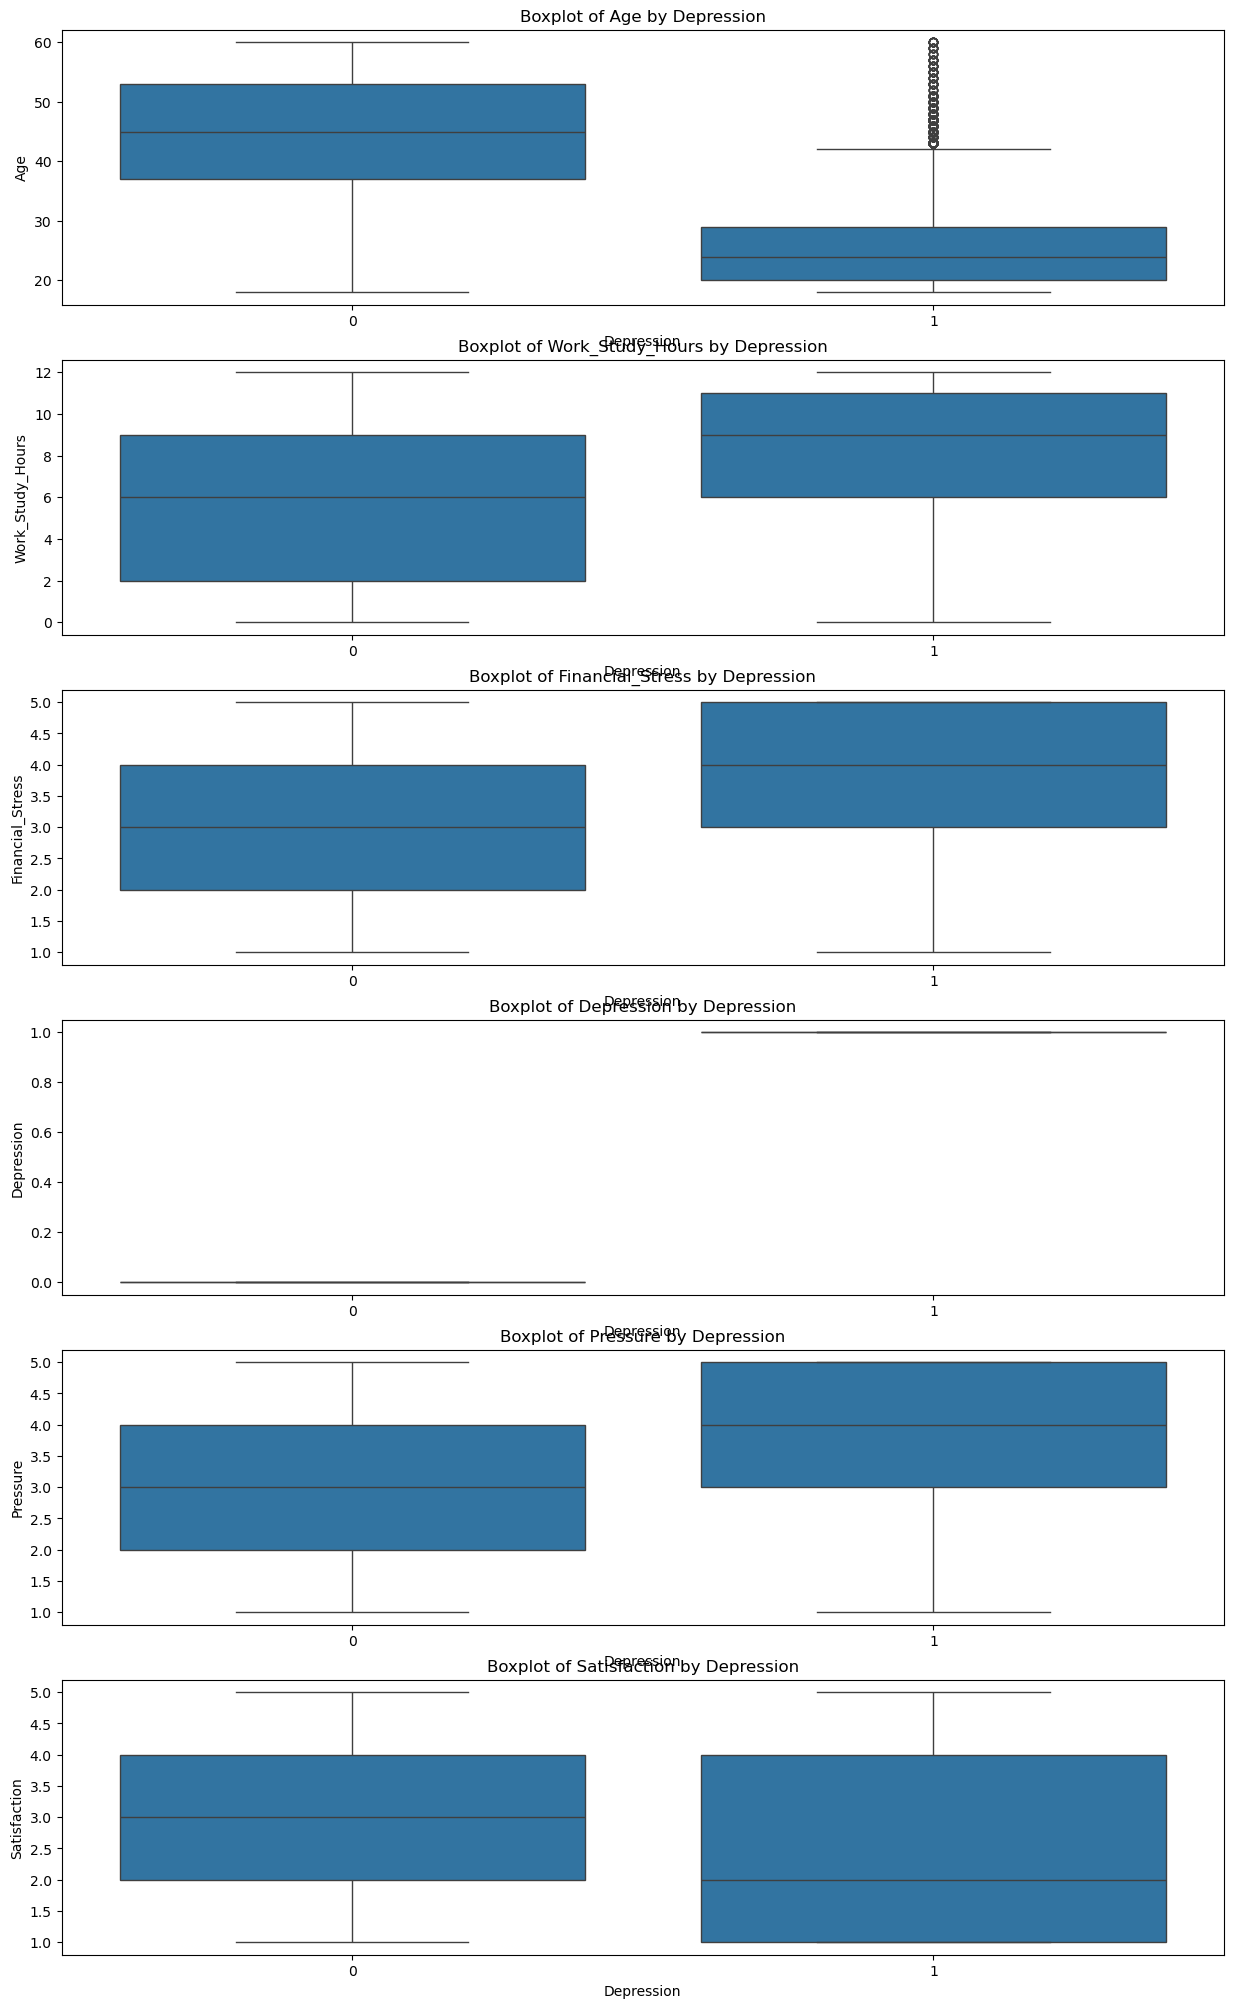

In [101]:

numerical_features = df_balanced.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(15, 25))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.boxplot(data=df, x='Depression', y=feature)
    plt.title(f'Boxplot of {feature} by Depression')
    plt.xlabel('Depression')
    plt.ylabel(feature)


plt.show()

Key Observations:
1. Age:
Negative correlation with Depression (-0.69): Younger individuals are more likely to experience depression.
Weak negative correlations with Pressure (-0.20) and Financial Stress (-0.16): Younger individuals tend to report slightly more pressure and financial stress.
2. Work_Study_Hours:
Positive correlation with Depression (0.25): Higher work/study hours are linked to an increased risk of depression.
Weak correlations with Pressure (0.06) and Financial Stress (0.06): No strong relationship with these factors.
3. Financial Stress:
Positive correlation with Depression (0.28): High financial stress strongly aligns with depression.
Weak positive correlation with Pressure (0.08): Financial stress increases slightly with pressure.
Weak negative correlation with Satisfaction (-0.06): Financial stress slightly decreases satisfaction.
4. Depression:
Positive correlation with Pressure (0.34): Higher pressure is associated with an increased likelihood of depression.
Negative correlation with Satisfaction (-0.18): Depressed individuals tend to report lower satisfaction levels.
5. Pressure:
Positive correlation with Depression (0.34): A clear link between high pressure and depression.
Weak negative correlation with Satisfaction (-0.09): Higher pressure slightly decreases satisfaction.
6. Satisfaction:
Negative correlation with Depression (-0.18): Lower satisfaction levels are associated with higher depression rates.
No strong correlations with other variables.

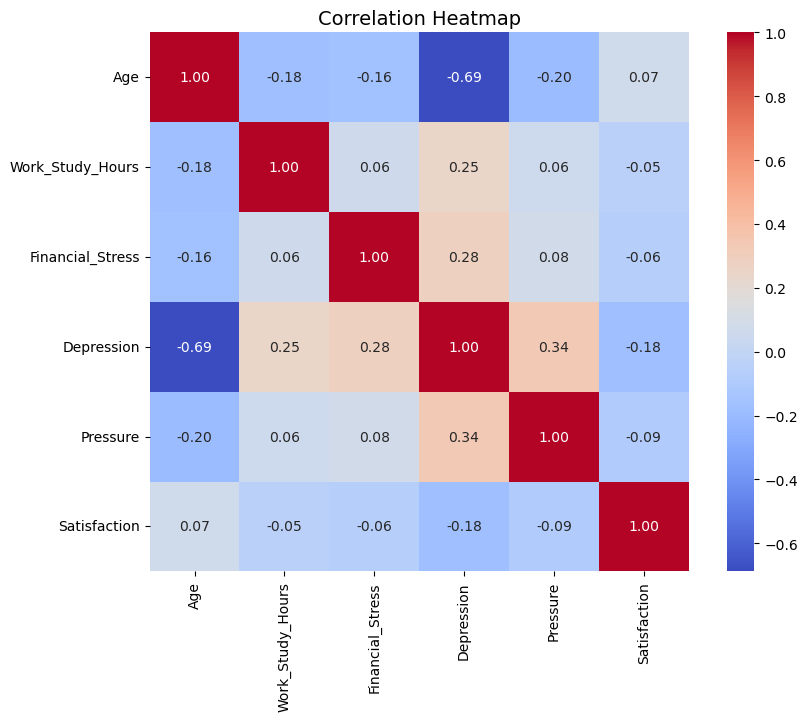

In [103]:
numerical_columns = ['Age', 'Work_Study_Hours', 'Financial_Stress', 'Depression', 'Pressure', 'Satisfaction']
plt.figure(figsize=(10, 7))
correlation_matrix = df_balanced[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

1.Encoding is performed for the categorical datatypes

2.Data is splitted into  Train and Test with 80% data used for the training and 20% for the testing

In [107]:
df_processed1 = df_balanced.copy()


categorical_cols = ['Gender', 'City', 'Profession_Status', 'Sleep_Duration',
                    'Dietary_Habits', 'Suicidal_Thoughts', 'Family_History']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed1[col] = le.fit_transform(df_processed1[col])
    label_encoders[col] = le  # Save encoder for later use


target = 'Depression'
X = df_processed1.drop(columns=[target])
y = df_processed1[target]


numerical_cols = ['Age', 'Work_Study_Hours', 'Financial_Stress', 'Pressure', 'Satisfaction']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((51037, 12), (12760, 12), (51037,), (12760,))

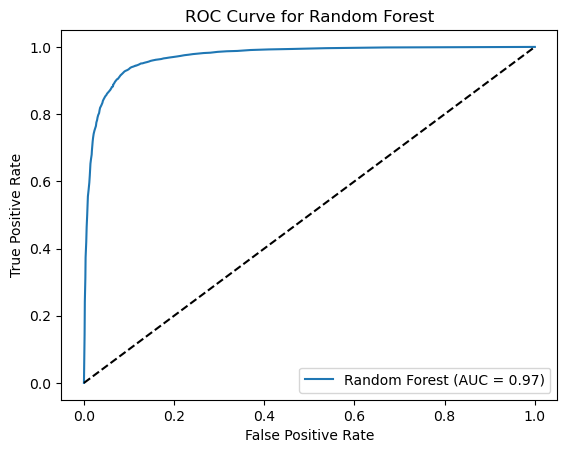

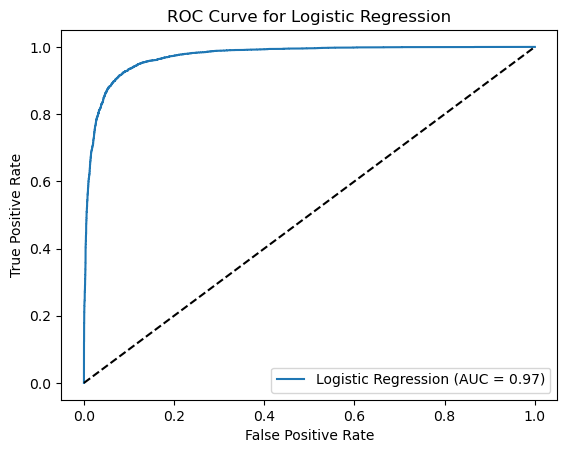

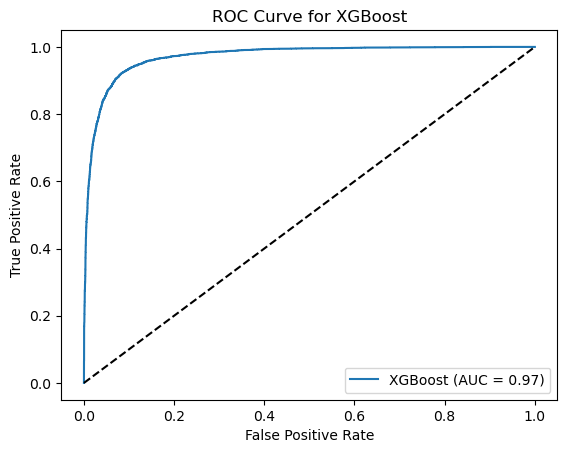

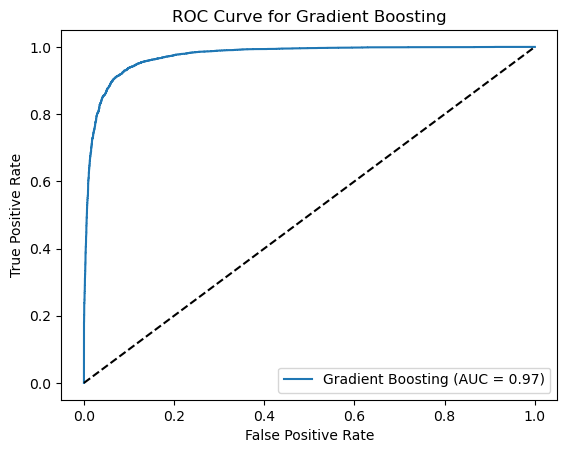

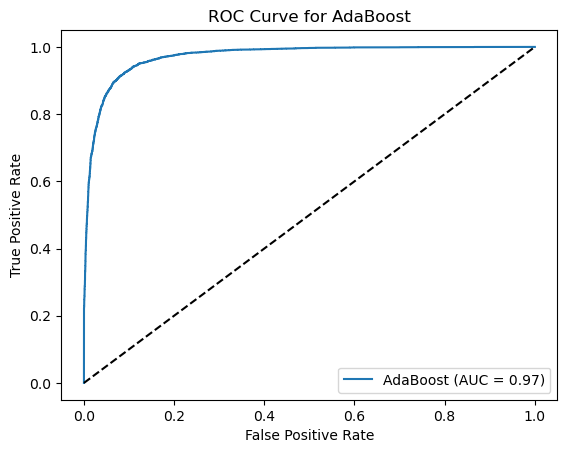

In [109]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME', random_state=42),
    
}


results_with_metrics = {}


for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
  
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = auc(fpr, tpr)
    except:
        y_proba = None
        fpr, tpr, auc_score = None, None, None
    
  
    accuracy = model.score(X_test, y_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    
    # Store results
    results_with_metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc_score
    }
    
    
    if fpr is not None and tpr is not None:
        plt.figure()
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}')
        plt.legend(loc='lower right')
        plt.show()



Summary of Model Performance:
Based on the evaluation metrics provided, here's the analysis:

1. Accuracy:
All models achieved high accuracy scores (above 91%).
Gradient Boosting performed the best with an accuracy of 92.18%, indicating its ability to generalize well to the test set.
2. Precision:
Precision measures how many of the predicted positive cases are actually positive.
Gradient Boosting had the highest precision (0.898) among the models, slightly ahead of XGBoost (0.897) and Logistic Regression (0.895).
3. Recall:
Recall measures how many actual positive cases were correctly identified.
Gradient Boosting achieved the highest recall (0.907), indicating its strength in identifying the positive cases.
Other models (e.g., Logistic Regression, AdaBoost) also had high recall scores.
4. F1-Score:
F1-Score is the harmonic mean of precision and recall, balancing false positives and false negatives.
Gradient Boosting had the highest F1-Score (0.903), followed by Logistic Regression (0.900) and XGBoost (0.899).
5. AUC (Area Under the ROC Curve):
AUC indicates how well the model can distinguish between classes. Higher values (closer to 1) are better.
Gradient Boosting achieved the highest AUC (0.974), showing superior ability to rank positive instances higher than negative ones.
Other models (e.g., Logistic Regression, AdaBoost, XGBoost) also had strong AUC scores (>0.97).

In [111]:
results_df_metrics = pd.DataFrame(results_with_metrics).T
print("Updated Simplified Model Evaluation Results with Extended Metrics:")
print(results_df_metrics)

Updated Simplified Model Evaluation Results with Extended Metrics:
                     Accuracy  Precision    Recall  F1-Score       AUC
Random Forest        0.917241   0.896396  0.896748  0.896572  0.970650
Logistic Regression  0.919279   0.895074  0.904193  0.899610  0.972548
XGBoost              0.919357   0.897096  0.901842  0.899463  0.971476
Gradient Boosting    0.921787   0.898177  0.907328  0.902729  0.973633
AdaBoost             0.917163   0.887718  0.907719  0.897607  0.972086


1. Random Forest:
True Negatives (TN): 7127 cases correctly predicted as negative.
False Positives (FP): 529 cases incorrectly predicted as positive.
False Negatives (FN): 527 cases incorrectly predicted as negative.
True Positives (TP): 4577 cases correctly predicted as positive.
Observation:
Random Forest shows a good balance between false positives and false negatives, with fewer incorrect predictions overall.
2. Logistic Regression:
True Negatives (TN): 7115 cases correctly predicted as negative.
False Positives (FP): 541 cases incorrectly predicted as positive.
False Negatives (FN): 489 cases incorrectly predicted as negative.
True Positives (TP): 4615 cases correctly predicted as positive.
Observation:
Logistic Regression has slightly fewer false negatives compared to Random Forest, meaning it identifies slightly more positive cases accurately.
3. XGBoost:
True Negatives (TN): 7128 cases correctly predicted as negative.
False Positives (FP): 528 cases incorrectly predicted as positive.
False Negatives (FN): 501 cases incorrectly predicted as negative.
True Positives (TP): 4603 cases correctly predicted as positive.
Observation:
XGBoost's performance is very similar to Random Forest, with marginally fewer false positives but slightly more false negatives.
4. Gradient Boosting:
True Negatives (TN): 7131 cases correctly predicted as negative.
False Positives (FP): 525 cases incorrectly predicted as positive.
False Negatives (FN): 473 cases incorrectly predicted as negative.
True Positives (TP): 4631 cases correctly predicted as positive.
Observation:
Gradient Boosting has the best performance overall, with the highest number of true positives and true negatives, and the lowest number of false negatives and false positives.
5. AdaBoost:
True Negatives (TN): 7070 cases correctly predicted as negative.
False Positives (FP): 586 cases incorrectly predicted as positive.
False Negatives (FN): 471 cases incorrectly predicted as negative.
True Positives (TP): 4633 cases correctly predicted as positive.
Observation:
AdaBoost performs well but has more false positives compared to Gradient Boosting, meaning it overpredicts positive cases slightly more often.
Overall Summary:
Gradient Boosting:
Best performance with the highest True Positives (4631) and True Negatives (7131).
Lowest False Negatives (473) and False Positives (525).
Logistic Regression:
Good performance with fewer false negatives (489), meaning it captures positives more effectively than Random Forest or XGBoost.
Random Forest and XGBoost:
Balanced models with performance very close to each other.
AdaBoost:
Performs well but shows a tendency to overpredict positives, leading to higher false positives.
Recommendation:
If minimizing both False Positives and False Negatives is critical, Gradient Boosting is the top choice.
For simpler interpretation and decent performance, Logistic Regression is a strong alternative.

In [113]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:\n{cm}\n")

Confusion Matrix for Random Forest:
[[7127  529]
 [ 527 4577]]

Confusion Matrix for Logistic Regression:
[[7115  541]
 [ 489 4615]]

Confusion Matrix for XGBoost:
[[7128  528]
 [ 501 4603]]

Confusion Matrix for Gradient Boosting:
[[7131  525]
 [ 473 4631]]

Confusion Matrix for AdaBoost:
[[7070  586]
 [ 471 4633]]



Performing Grid Search for Random Forest on Sampled Data...


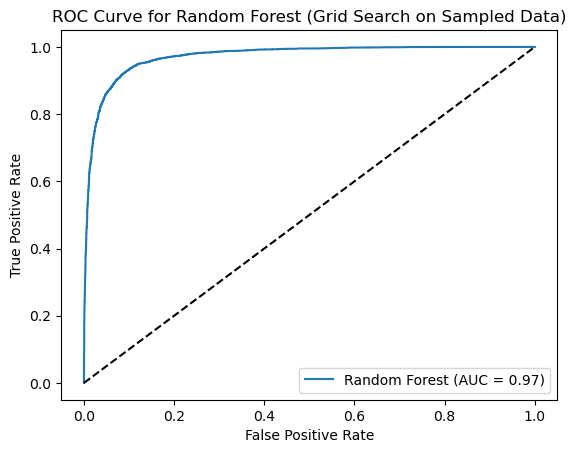

Performing Grid Search for Logistic Regression on Sampled Data...


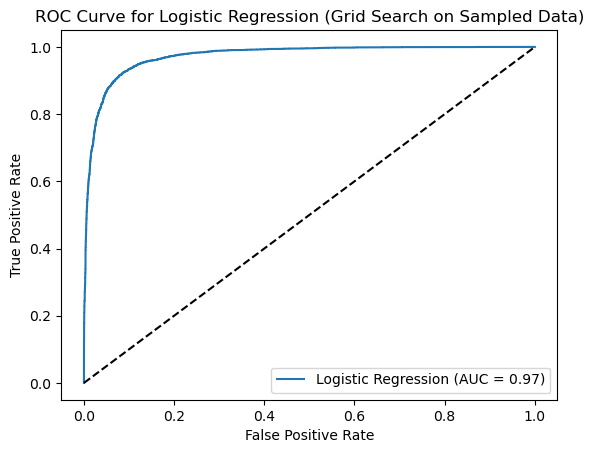

Performing Grid Search for XGBoost on Sampled Data...


C:\Users\varanasi.patra\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


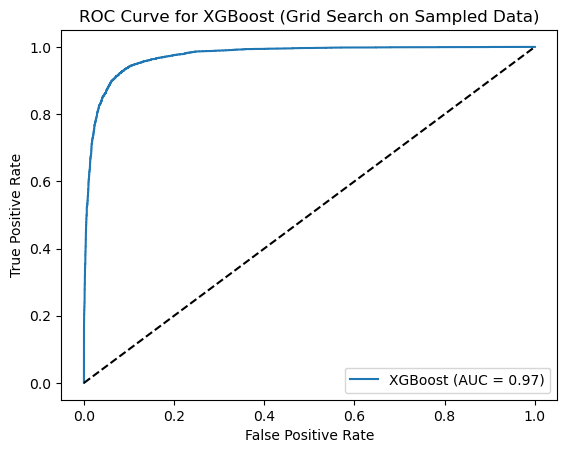

Performing Grid Search for Gradient Boosting on Sampled Data...


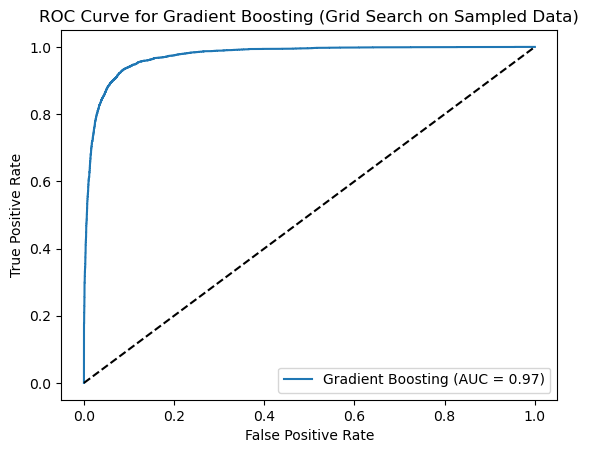

Performing Grid Search for AdaBoost on Sampled Data...


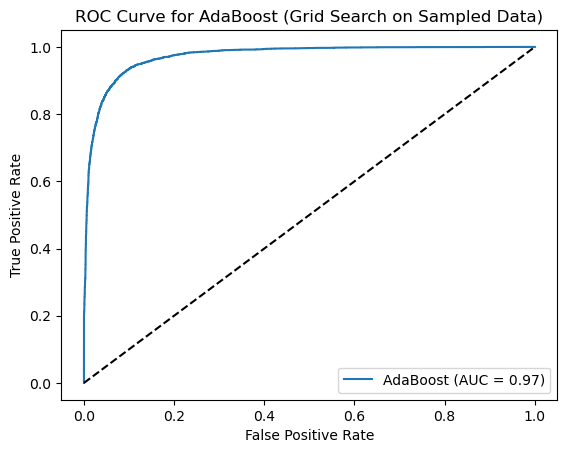

Grid Search Results on Sampled Data with Best Parameters and Metrics:
                                                       Best Parameters  \
Random Forest        {'max_depth': None, 'min_samples_split': 5, 'n...   
Logistic Regression                    {'C': 1, 'solver': 'liblinear'}   
XGBoost              {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...   
Gradient Boosting    {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...   
AdaBoost                   {'learning_rate': 0.5, 'n_estimators': 100}   

                     Accuracy Precision    Recall  F1-Score       AUC  
Random Forest        0.917006   0.89448  0.898511  0.896491   0.97136  
Logistic Regression  0.919357  0.894941  0.904585  0.899737  0.972548  
XGBoost              0.921865   0.89866  0.906936  0.902779  0.974067  
Gradient Boosting    0.920846  0.896705  0.906544  0.901598  0.974065  
AdaBoost             0.917712  0.886095  0.911442   0.89859  0.972934  


In [115]:
adjusted_param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5]
    },
    'Logistic Regression': {
        'C': [0.1, 1],
        'solver': ['liblinear']
    },
    'XGBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.1, 0.2],
        'max_depth': [3, 6]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.1, 0.2],
        'max_depth': [3, 6]
    },
    'AdaBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.1, 0.5]
    }
}


grid_search_results_sampled = {}


for model_name, model in models.items():
    print(f"Performing Grid Search for {model_name} on Sampled Data...")
    if model_name in adjusted_param_grids:
        grid_search = GridSearchCV(estimator=model, param_grid=adjusted_param_grids[model_name], 
                                   cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        
      
        y_pred = best_model.predict(X_test)
        try:
            y_proba = best_model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            auc_score = auc(fpr, tpr)
        except:
            y_proba = None
            fpr, tpr, auc_score = None, None, None
        
        accuracy = best_model.score(X_test, y_test)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
        
      
        grid_search_results_sampled[model_name] = {
            'Best Parameters': grid_search.best_params_,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC': auc_score
        }
        
        
        if fpr is not None and tpr is not None:
            plt.figure()
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
            plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve for {model_name} (Grid Search on Sampled Data)')
            plt.legend(loc='lower right')
            plt.show()


grid_search_results_sampled_df = pd.DataFrame(grid_search_results_sampled).T
print("Grid Search Results on Sampled Data with Best Parameters and Metrics:")
print(grid_search_results_sampled_df)

 Observations:
XGBoost:
Best overall performance across most metrics (Accuracy, Precision, F1-Score, AUC).
Slightly lower recall compared to AdaBoost.
AdaBoost:
Highest recall (0.911442), which is useful when identifying all positive cases is critical.
Slightly lower precision and F1-score compared to XGBoost.
Gradient Boosting:
Close to XGBoost in performance, with nearly identical AUC (0.974065).
Logistic Regression:
Simpler model but performs competitively (Accuracy = 0.919357, AUC = 0.972548).
Random Forest:
Performs well overall but slightly behind the other models.
4. Key Insights:
XGBoost is the best overall model, with the highest Accuracy, Precision, F1-Score, and AUC.
AdaBoost is best for applications where Recall is the priority (e.g., medical diagnostics, fraud detection).
Logistic Regression offers a simpler model with competitive performance, making it suitable for interpretable scenarios.
Ensemble methods (XGBoost, Gradient Boosting, AdaBoost) consistently outperform Random Forest and Logistic Regression, showcasing their effectiveness in complex datasets.

